# The Battle of Neighborhoods: Hamburg for a coffee place

This project is part of the final assignment of the IBM certificat for Data Science.

It is split in the following parts:
1. Business Understanding
2. Data Understanding
3. Methodology
4. Analysis
5. Results
6. Discussion and recommendation
7. Conclusion

In the first part we only deal with the __business background__ to understand the underlying question and the need to do this analysis. 
Furthermore, this part gives a brief __overview of the used data__.

## 1. Business Understanding

**Target**

Entering the German market successfully with the PersonalCoffeeLovers Cafe. 

**Background**

Germany is known as a core market in Europe and it is vital for the European success for our cafe brand. A preliminarly analysis already found Hamburg as a suitable start. Hamburg offers a vivid coffee culture rooted back to the trade of the Hansa. Hamburg the second biggest city in Hamburg and is considered very livable. The people in Hamburg are known for appreciating quality. With our brand we offer the best and highest quality to a reasonable price. Hamburg is considered wealthy.

**Target Audience**

To solve this problem a Data Science team has to be formed.The team is expected to report to the companies management and to the shareholders to make a well informed and smart decision. The management expects rational problemsolving for this project because its crucial for entering the German market. 
 

**Success Criteria**

The project is successful if a rational recommendation of a quarter of Hamburg is given. It should be considered to look for quarters with an already existing cafe culture and furthermore it should be affortable to start a business there (low price per m2) but reach a big customership (high demand).

## 2. Data Understanding

To solve this task different data is needed. 
We need the quarters, coordinates, venues, and further information about the quarters. 

The expected dataframe should consist of the following features:
- Quarter
- Latitude
- Longitude
- Population: This could be an indicator for demand
- Price per $m^{2}$: This could be an indicator for the affortability
- Population under 18 in %
- Population over 64 in %
- Venues in the Quarter: This is needed to find the candidates for opening a cafe

To analize and find suitable quarters for the cafe the above features can be optained by different souces:
1. Quarters: Names of the quarters of Hamburg with additional information about the demographics of the quarters, such as population and price per $m^{2}$. This information can be optained under: http://suche.transparenz.hamburg.de/dataset/stadtteil-profile-hamburg4?forceWeb=true
2. Location of the Quarters: This can be found with the use of Geocoder. 
3. Foresquare: It is a local search-and-discover service which provides information on different types of entertainment, drinking and dining venues. Forsquare can be accessed by an API. 

Furthermore, the data has to be inspected, cleaned and structured.


# 3. Methodology

- **Webscraping**: We use public available data and bring it in a structured format.
- **Foursquare**: Retrieving venue information
- **k-Means Clustering**: Segement and cluster similar quarters and group them based on common venues.
- **Data Visualization**: For a better understanding we visualize the results.

# 4. Analysis

First we import and install all necessary libaries.

In [1]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests
import json # library to handle JSON files
import bs4 as bs
import urllib.request

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

# geocoder
!conda install -c conda-forge geocoder --yes 
import geocoder

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

# use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import time

print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geocoder:        1.38.1-py_1       conda-forge
    python_abi:    

Then we scrape the dataframe.

In [3]:
df = pd.read_excel("https://www.statistik-nord.de/fileadmin/Dokumente/Datenbanken_und_Karten/Stadtteilprofile/StadtteilprofileBerichtsjahr2017.xlsx", header=3, nrows=99)

In [4]:
df.rename(columns={'Unnamed: 0':"Quarter"}, inplace=True)

Lets explore the dataset, if everything is imported correctly.

In [5]:
print(df.shape)
df.tail(5)

(99, 67)


,Quarter,Anzahl der Einwohnerinnen und Einwohner,Anzahl der Kinder und Jugendlichen unter 18 Jahren,Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung,Anzahl älterer Einwohnerinnen und Einwohner über 64 Jahren,Anteil älterer Einwohnerinnen und Einwohner über 64 Jahren an der Gesamt-bevölkerung,Anzahl ausländischer Einwohnerinnen und Einwohner,Anteil ausländischer Einwohnerinnen und Einwohner an der Gesamt-bevölkerung,Anzahl der Einwohnerinnen und Einwohner mit Migrations-hintergrund,Anteil der Einwohnerinnen und Einwohner mit Migrations-hintergrund an der Gesamt-bevölkerung,Anzahl der Kinder und Jugendlichen unter 18 Jahren mit Migrations-hintergrund,Anteil Kinder und Jugendlicher unter 18 Jahren mit Migrations-hintergrund an allen Kindern und Jugendlichen unter 18 Jahren,Anzahl der Haushalte,Durchschnittliche Anzahl der Personen je Haushalt,Anzahl der Einpersonen-haushalte,"Anteil der Haushalte, in denen nur eine Person lebt, an allen Haushalten",Anzahl der Haushalte mit Kindern,"Anteil der Haushalte, in denen Kinder leben, an allen Haushalten","Anzahl der Haushalte, in denen Alleinerziehende leben","Anteil der Haushalte, in denen Alleinerziehende leben, an allen Haushalten mit Kindern",Fläche in km²,Einwohnerinnen und Einwohner je km²,Anzahl der Lebendgeborenen,Anzahl der Sterbefälle,Zuzüge über die Stadtteilgrenze im Jahr 2017,Fortzüge über die Stadtteilgrenze im Jahr 2017,Differenz der Zuzüge und Fortzüge über die Stadtteilgrenze,Sozial-versicherungs-pflichtig Beschäftigte am Wohnort,Anteil sozial-versicherungs-pflichtig Beschäftigter am Wohnort an den Erwerbsfähigen (15 bis unter 65-Jährige),Anzahl der Arbeitslosen,Anteil der Arbeitslosen an den Erwerbsfähigen (15 bis unter 65-Jährige),Jüngere Arbeitslose im Alter von 15 bis unter 25 Jahren,Anteil jüngerer Arbeitsloser (15 bis unter 25-Jährige) an den jüngeren Erwerbsfähigen (15 bis unter 25-Jährige),Ältere Arbeitslose im Alter von 55 bis unter 65 Jahren,Anteil älterer Arbeitsloser (55 bis unter 65-Jährige) an den älteren Erwerbsfähigen (55 bis unter 65-Jährige),Anzahl der Leistungs-empfängerinnen und Leistungs-empfänger nach SGB II,Anteil der Leistungs-empfängerinnen und Leistungs-empfänger nach SGB II an der Gesamt-bevölkerung,Anzahl der Leistungs-empfängerinnen und Leistungs-empfänger nach SGB II unter 15 Jahren,Anteil der Leistungs-empfängerinnen und Leistungs-empfänger nach SGB II unter 15 Jahren an der Bevölkerung unter 15 Jahren,Anzahl der Bedarfs-gemeinschaften nach SGB II,Anzahl der Lohn- und Einkommen-steuerpflichtigen (2013),Gesamtbetrag der Einkünfte je Steuerpflichtigen (Lohn- und Einkommen-steuer) im Jahr,Anzahl der Wohngebäude,Anzahl der Wohnungen,Anzahl der bezugsfertig gewordenen Wohnungen im Jahr,Anzahl der Wohnungen in Ein- und Zweifamilien-häusern,Anteil der Wohnungen in Ein- und Zweifamilien-häusern an allen Wohnungen,Durchschnittliche Wohnungsgröße in m²,Durchschnittliche Wohnfläche je Einwohner/-in in m²,Anzahl der Sozialwohnungen,Anteil der Sozialwohnungen an allen Wohnungen,Anzahl der Sozialwohnungen mit Bindungsauslauf bis 2022,Anteil der Sozialwohnungen mit Bindungsauslauf bis 2022 an allen Sozialwohnungen,Durchschnittlicher Immobilienpreis für ein Grundstück in EUR/m²,Durchschnittlicher Immobilienpreis für ein Ein- bzw Zweifamilienhaus in EUR/m²,Durchschnittlicher Immobilienpreis für eine Eigentums-wohnung in EUR/m²,Kindergärten und Vorschulklassen für Kinder im Alter von 3 Jahren bis Schuleintritt,Anzahl der Grundschulen,Anzahl der Schülerinnen und Schüler der Sekundarstufe I (nach Wohnort),Anteil der Schülerinnen und Schüler in Stadtteilschulen an allen Schülerinnen und Schülern der Sekundarstufe I (nach Wohnort),Anteil der Schülerinnen und Schüler in Gymnasien an allen Schülerinnen und Schülern der Sekundarstufe I (nach Wohnort),Anzahl der niedergelassenen Ärzte,Anzahl der Allgemeinärzte,Anzahl der Zahnärzte,Anzahl der Apotheken,Anzahl privater PKW,Anzahl der privaten PKW je 1 000 Einwohnerinnen und Einwohner
94,Hausbru

In [6]:
df.head()

,Quarter,Anzahl der Einwohnerinnen und Einwohner,Anzahl der Kinder und Jugendlichen unter 18 Jahren,Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung,Anzahl älterer Einwohnerinnen und Einwohner über 64 Jahren,Anteil älterer Einwohnerinnen und Einwohner über 64 Jahren an der Gesamt-bevölkerung,Anzahl ausländischer Einwohnerinnen und Einwohner,Anteil ausländischer Einwohnerinnen und Einwohner an der Gesamt-bevölkerung,Anzahl der Einwohnerinnen und Einwohner mit Migrations-hintergrund,Anteil der Einwohnerinnen und Einwohner mit Migrations-hintergrund an der Gesamt-bevölkerung,Anzahl der Kinder und Jugendlichen unter 18 Jahren mit Migrations-hintergrund,Anteil Kinder und Jugendlicher unter 18 Jahren mit Migrations-hintergrund an allen Kindern und Jugendlichen unter 18 Jahren,Anzahl der Haushalte,Durchschnittliche Anzahl der Personen je Haushalt,Anzahl der Einpersonen-haushalte,"Anteil der Haushalte, in denen nur eine Person lebt, an allen Haushalten",Anzahl der Haushalte mit Kindern,"Anteil der Haushalte, in denen Kinder leben, an allen Haushalten","Anzahl der Haushalte, in denen Alleinerziehende leben","Anteil der Haushalte, in denen Alleinerziehende leben, an allen Haushalten mit Kindern",Fläche in km²,Einwohnerinnen und Einwohner je km²,Anzahl der Lebendgeborenen,Anzahl der Sterbefälle,Zuzüge über die Stadtteilgrenze im Jahr 2017,Fortzüge über die Stadtteilgrenze im Jahr 2017,Differenz der Zuzüge und Fortzüge über die Stadtteilgrenze,Sozial-versicherungs-pflichtig Beschäftigte am Wohnort,Anteil sozial-versicherungs-pflichtig Beschäftigter am Wohnort an den Erwerbsfähigen (15 bis unter 65-Jährige),Anzahl der Arbeitslosen,Anteil der Arbeitslosen an den Erwerbsfähigen (15 bis unter 65-Jährige),Jüngere Arbeitslose im Alter von 15 bis unter 25 Jahren,Anteil jüngerer Arbeitsloser (15 bis unter 25-Jährige) an den jüngeren Erwerbsfähigen (15 bis unter 25-Jährige),Ältere Arbeitslose im Alter von 55 bis unter 65 Jahren,Anteil älterer Arbeitsloser (55 bis unter 65-Jährige) an den älteren Erwerbsfähigen (55 bis unter 65-Jährige),Anzahl der Leistungs-empfängerinnen und Leistungs-empfänger nach SGB II,Anteil der Leistungs-empfängerinnen und Leistungs-empfänger nach SGB II an der Gesamt-bevölkerung,Anzahl der Leistungs-empfängerinnen und Leistungs-empfänger nach SGB II unter 15 Jahren,Anteil der Leistungs-empfängerinnen und Leistungs-empfänger nach SGB II unter 15 Jahren an der Bevölkerung unter 15 Jahren,Anzahl der Bedarfs-gemeinschaften nach SGB II,Anzahl der Lohn- und Einkommen-steuerpflichtigen (2013),Gesamtbetrag der Einkünfte je Steuerpflichtigen (Lohn- und Einkommen-steuer) im Jahr,Anzahl der Wohngebäude,Anzahl der Wohnungen,Anzahl der bezugsfertig gewordenen Wohnungen im Jahr,Anzahl der Wohnungen in Ein- und Zweifamilien-häusern,Anteil der Wohnungen in Ein- und Zweifamilien-häusern an allen Wohnungen,Durchschnittliche Wohnungsgröße in m²,Durchschnittliche Wohnfläche je Einwohner/-in in m²,Anzahl der Sozialwohnungen,Anteil der Sozialwohnungen an allen Wohnungen,Anzahl der Sozialwohnungen mit Bindungsauslauf bis 2022,Anteil der Sozialwohnungen mit Bindungsauslauf bis 2022 an allen Sozialwohnungen,Durchschnittlicher Immobilienpreis für ein Grundstück in EUR/m²,Durchschnittlicher Immobilienpreis für ein Ein- bzw Zweifamilienhaus in EUR/m²,Durchschnittlicher Immobilienpreis für eine Eigentums-wohnung in EUR/m²,Kindergärten und Vorschulklassen für Kinder im Alter von 3 Jahren bis Schuleintritt,Anzahl der Grundschulen,Anzahl der Schülerinnen und Schüler der Sekundarstufe I (nach Wohnort),Anteil der Schülerinnen und Schüler in Stadtteilschulen an allen Schülerinnen und Schülern der Sekundarstufe I (nach Wohnort),Anteil der Schülerinnen und Schüler in Gymnasien an allen Schülerinnen und Schülern der Sekundarstufe I (nach Wohnort),Anzahl der niedergelassenen Ärzte,Anzahl der Allgemeinärzte,Anzahl der Zahnärzte,Anzahl der Apotheken,Anzahl privater PKW,Anzahl der privaten PKW je 1 000 Einwohnerinnen und Einwohner
0,Hamburg-

As it seems the dataset got imported correctly.

To put the population size into perspective we calculate the relative population distribution among the quarters.

In [7]:
total_population = df['Anzahl der Einwohnerinnen und Einwohner'].sum()
#print (total_population)

# the higher populated neighbourhood will have the higher score
df['Population Score'] = df['Anzahl der Einwohnerinnen und Einwohner']/total_population*100

# sort the dataframe based on the descending population score
df = df.sort_values('Population Score', ascending=False)
df.head(10)

,Quarter,Anzahl der Einwohnerinnen und Einwohner,Anzahl der Kinder und Jugendlichen unter 18 Jahren,Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung,Anzahl älterer Einwohnerinnen und Einwohner über 64 Jahren,Anteil älterer Einwohnerinnen und Einwohner über 64 Jahren an der Gesamt-bevölkerung,Anzahl ausländischer Einwohnerinnen und Einwohner,Anteil ausländischer Einwohnerinnen und Einwohner an der Gesamt-bevölkerung,Anzahl der Einwohnerinnen und Einwohner mit Migrations-hintergrund,Anteil der Einwohnerinnen und Einwohner mit Migrations-hintergrund an der Gesamt-bevölkerung,Anzahl der Kinder und Jugendlichen unter 18 Jahren mit Migrations-hintergrund,Anteil Kinder und Jugendlicher unter 18 Jahren mit Migrations-hintergrund an allen Kindern und Jugendlichen unter 18 Jahren,Anzahl der Haushalte,Durchschnittliche Anzahl der Personen je Haushalt,Anzahl der Einpersonen-haushalte,"Anteil der Haushalte, in denen nur eine Person lebt, an allen Haushalten",Anzahl der Haushalte mit Kindern,"Anteil der Haushalte, in denen Kinder leben, an allen Haushalten","Anzahl der Haushalte, in denen Alleinerziehende leben","Anteil der Haushalte, in denen Alleinerziehende leben, an allen Haushalten mit Kindern",Fläche in km²,Einwohnerinnen und Einwohner je km²,Anzahl der Lebendgeborenen,Anzahl der Sterbefälle,Zuzüge über die Stadtteilgrenze im Jahr 2017,Fortzüge über die Stadtteilgrenze im Jahr 2017,Differenz der Zuzüge und Fortzüge über die Stadtteilgrenze,Sozial-versicherungs-pflichtig Beschäftigte am Wohnort,Anteil sozial-versicherungs-pflichtig Beschäftigter am Wohnort an den Erwerbsfähigen (15 bis unter 65-Jährige),Anzahl der Arbeitslosen,Anteil der Arbeitslosen an den Erwerbsfähigen (15 bis unter 65-Jährige),Jüngere Arbeitslose im Alter von 15 bis unter 25 Jahren,Anteil jüngerer Arbeitsloser (15 bis unter 25-Jährige) an den jüngeren Erwerbsfähigen (15 bis unter 25-Jährige),Ältere Arbeitslose im Alter von 55 bis unter 65 Jahren,Anteil älterer Arbeitsloser (55 bis unter 65-Jährige) an den älteren Erwerbsfähigen (55 bis unter 65-Jährige),Anzahl der Leistungs-empfängerinnen und Leistungs-empfänger nach SGB II,Anteil der Leistungs-empfängerinnen und Leistungs-empfänger nach SGB II an der Gesamt-bevölkerung,Anzahl der Leistungs-empfängerinnen und Leistungs-empfänger nach SGB II unter 15 Jahren,Anteil der Leistungs-empfängerinnen und Leistungs-empfänger nach SGB II unter 15 Jahren an der Bevölkerung unter 15 Jahren,Anzahl der Bedarfs-gemeinschaften nach SGB II,Anzahl der Lohn- und Einkommen-steuerpflichtigen (2013),Gesamtbetrag der Einkünfte je Steuerpflichtigen (Lohn- und Einkommen-steuer) im Jahr,Anzahl der Wohngebäude,Anzahl der Wohnungen,Anzahl der bezugsfertig gewordenen Wohnungen im Jahr,Anzahl der Wohnungen in Ein- und Zweifamilien-häusern,Anteil der Wohnungen in Ein- und Zweifamilien-häusern an allen Wohnungen,Durchschnittliche Wohnungsgröße in m²,Durchschnittliche Wohnfläche je Einwohner/-in in m²,Anzahl der Sozialwohnungen,Anteil der Sozialwohnungen an allen Wohnungen,Anzahl der Sozialwohnungen mit Bindungsauslauf bis 2022,Anteil der Sozialwohnungen mit Bindungsauslauf bis 2022 an allen Sozialwohnungen,Durchschnittlicher Immobilienpreis für ein Grundstück in EUR/m²,Durchschnittlicher Immobilienpreis für ein Ein- bzw Zweifamilienhaus in EUR/m²,Durchschnittlicher Immobilienpreis für eine Eigentums-wohnung in EUR/m²,Kindergärten und Vorschulklassen für Kinder im Alter von 3 Jahren bis Schuleintritt,Anzahl der Grundschulen,Anzahl der Schülerinnen und Schüler der Sekundarstufe I (nach Wohnort),Anteil der Schülerinnen und Schüler in Stadtteilschulen an allen Schülerinnen und Schülern der Sekundarstufe I (nach Wohnort),Anteil der Schülerinnen und Schüler in Gymnasien an allen Schülerinnen und Schülern der Sekundarstufe I (nach Wohnort),Anzahl der niedergelassenen Ärzte,Anzahl der Allgemeinärzte,Anzahl der Zahnärzte,Anzahl der Apotheken,Anzahl privater PKW,Anzahl der privaten PKW je 1 000 Einwohnerinnen und Einwohner,Population

Figured out the most populated quarters in Hamburg we want to visualize them.

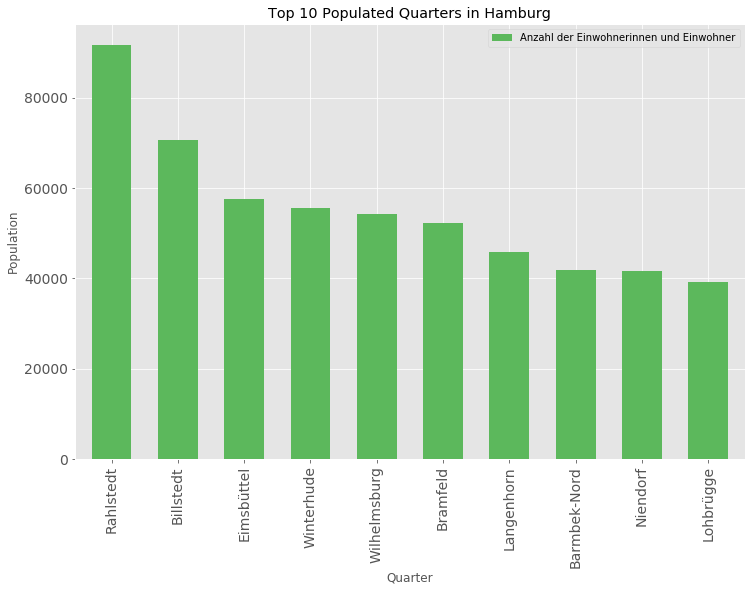

In [8]:
population_chart = df[['Quarter', 'Anzahl der Einwohnerinnen und Einwohner']].copy()
top_chart = population_chart.head(10)
top_chart.set_index('Quarter', inplace=True)

# plot data
colors = ['#5cb85c', '#5bc0de', '#d9534f']
top_chart.plot(kind='bar', figsize=(12, 8), width=0.6, fontsize=14, color=colors)

plt.xlabel('Quarter') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Top 10 Populated Quarters in Hamburg') # add title to the plot

plt.show()

We have a lot of information provided in this dataset. Let us focus only on the relavant one for this project.

In [9]:
df_work = df[['Quarter','Population Score','Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung', 'Anteil älterer Einwohnerinnen und Einwohner über 64 Jahren an der Gesamt-bevölkerung', 'Durchschnittlicher Immobilienpreis für eine Eigentums-wohnung in EUR/m²']]
df_work.head()  

,Quarter,Population Score,Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung,Anteil älterer Einwohnerinnen und Einwohner über 64 Jahren an der Gesamt-bevölkerung,Durchschnittlicher Immobilienpreis für eine Eigentums-wohnung in EUR/m²
69,Rahlstedt,4.895785,17.447630,22.276261,2990
9,Billstedt,3.765894,19.355250,17.927671,2932
30,Eimsbüttel,3.071965,12.832589,12.606663,4982
43,Winterhude,2.971062,12.529874,14.556791,5780
13,Wilhelmsburg,2.891942,20.742491,13.465266,3249


For a better international understanding the columns get a English title.

In [10]:
#Rename the columns into English
df_work.columns = ['Quarter','Population in %', 'People under 18 years in %', 'People over 64 years in %', 'Price per m2 in EUR']
df_work.shape

(99, 5)

## Latitude and Longitude of Quarters

To get the coordinates for each quarter we use Geocoders application Nominatim.

In [11]:
#First we test if it is working by pickig a random example.
locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('Kleiner Grasbrook, Hamburg, Germany')

In [12]:
#We noticed that some quarters have "double" names. We have to simplify these names into a place Geocoder knows.
df_work['Quarter'].replace("Kleiner Grasbrook und Steinwerder", "Kleiner Grasbrook", inplace=True)
df_work['Quarter'].replace("Neuland und Gut Moor", "Neuland", inplace=True)
df_work['Quarter'].replace("Moorburg und Altenwerder", "Moorburg", inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [13]:
#Add the specification "city and country" to quarters to make it findable by Geocoder 
df_work["geo"] = df_work['Quarter'] + ', Hamburg, Germany'
df_work['geo'].head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


69       Rahlstedt, Hamburg, Germany
9        Billstedt, Hamburg, Germany
30      Eimsbüttel, Hamburg, Germany
43      Winterhude, Hamburg, Germany
13    Wilhelmsburg, Hamburg, Germany
Name: geo, dtype: object

In [14]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df_work['location'] = df_work['geo'].apply(geocode)
# 3 - create longitude, latitude and altitude from location column (returns tuple)
df_work['point'] = df_work['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df_work[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_work['point'].tolist(), index=df.index)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Barmbek-Süd, Hamburg, Germany',), **{}).
Traceback (most recent call last):
  File "/opt/conda/envs/Python36/lib/python3.6/urllib/request.py", line 1318, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1254, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1300, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1249, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1036, in _send_output
    self.send(msg)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 974, in send
    self.connect()
  File "/opt/conda/envs/Python36/lib/python

In [15]:
#Delete the no more needed columns and check the dataframe
df_work.drop(['geo', 'location', 'point', 'altitude'], axis=1, inplace=True)
df_work.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Quarter,Population in %,People under 18 years in %,People over 64 years in %,Price per m2 in EUR,latitude,longitude
69,Rahlstedt,4.895785,17.447630,22.276261,2990,53.603883,10.158155
9,Billstedt,3.765894,19.355250,17.927671,2932,53.548899,10.122625
30,Eimsbüttel,3.071965,12.832589,12.606663,4982,53.572483,9.950100
43,Winterhude,2.971062,12.529874,14.556791,5780,53.596390,10.003832
13,Wilhelmsburg,2.891942,20.742491,13.465266,3249,53.492292,9.996217


Lets visualize the quarters on a map with Folium.

In [17]:
map1 = folium.Map(
    location=[53.551086,9.993682],
    tiles='cartodbpositron',
    zoom_start=10,
)
df_work.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)
map1

## Explore the Quarters with Foursquare API

In [18]:
CLIENT_ID = 'YDMXTKLCNVMWHO110N4LWEY5LA3K4PLKAMZZMWAYCVKKXBIJ' #'your-client-ID' # your Foursquare ID
CLIENT_SECRET = '3J0FTWLFB2RWL4VJSNAA50TYUA4QFAYLRPP45ONMUPDDNPGP' #'your-client-secret' # your Foursquare Secret
VERSION = '20190325' # Foursquare API version

print('My credentails:')
print('My CLIENT_ID: ' + CLIENT_ID)
print('My CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
My CLIENT_ID: YDMXTKLCNVMWHO110N4LWEY5LA3K4PLKAMZZMWAYCVKKXBIJ
My CLIENT_SECRET:3J0FTWLFB2RWL4VJSNAA50TYUA4QFAYLRPP45ONMUPDDNPGP


In [19]:
radius = 1000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Quarter', 
                  'latitude', 
                  'longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

In [20]:
Hamburg_Venues = getNearbyVenues(names=df_work['Quarter'],
                                   latitudes=df_work['latitude'],
                                   longitudes=df_work['longitude']
                                  )

Rahlstedt
Billstedt
Eimsbüttel
Winterhude
Wilhelmsburg
Bramfeld
Langenhorn
Barmbek-Nord
Niendorf
Lohbrügge
Hamm
Horn
Lurup
Wandsbek
Bergedorf
Ottensen
Barmbek-Süd
Farmsen-Berne
Eidelstedt
Bahrenfeld
Neugraben-Fischbek
Schnelsen
Altona-Altstadt
Lokstedt
Osdorf
Jenfeld
Harburg
Stellingen
Eppendorf
Eißendorf
Neuallermöhe
Sasel
Poppenbüttel
Altona-Nord
St. Pauli
Heimfeld
Eilbek
Volksdorf
Steilshoop
Uhlenhorst
Harvestehude
Hummelsbüttel
Dulsberg
Wilstorf
Hausbruch
Rotherbaum
Ohlsdorf
Rissen
Othmarschen
Alsterdorf
Tonndorf
Blankenese
Hoheluft-West
Marienthal
Neustadt
Fuhlsbüttel
Waltershof und Finkenwerder
Iserbrook
St. Georg
Groß Flottbek
Bergstedt
Wellingsbüttel
Hohenfelde
Kirchwerder
Hoheluft-Ost
Sülldorf
Rothenburgsort
Marmstorf
Groß Borstel
Sternschanze
Borgfelde
Nienstedten
Lemsahl-Mellingstedt
Duvenstedt
Neuenfelde
Veddel
Wohldorf-Ohlstedt
Sinstorf
Langenbek
Curslack
Hammerbrook
Billwerder
Neuengamme
HafenCity
Rönneburg
Ochsenwerder
Hamburg-Altstadt
Altengamme
Billbrook
Neuland
Allerm

Check the last rows if everything worked correct.

In [21]:
print ("Shape of the Venues Dataframe: ", Hamburg_Venues.shape)
Hamburg_Venues.tail(3)

Shape of the Venues Dataframe:  (3134, 7)


,Quarter,latitude,longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
3131,Spadenland,53.481400,10.066400,Gemüsefrau,53.488781,10.059938,Farmers Market
3132,Reitbrook,53.468845,10.152123,See hinterm Horn,53.472813,10.154882,Lake
3133,Reitbrook,53.468845,10.152123,Klein Paradiso,53.472332,10.145248,River


Next we explore the result even more by having a look at the venues and their frequency.

In [22]:
print('There are {} unique categories.'.format(len(Hamburg_Venues['Venue_Category'].unique())))
## We can check some of the categories randomly  
print (Hamburg_Venues[['Venue_Category']][70:75])

There are 297 unique categories.
   Venue_Category
70            Pub
71           Park
72  Design Studio
73   Dessert Shop
74      Drugstore


In [23]:
print (Hamburg_Venues['Venue_Category'].value_counts())

Café                             204
Supermarket                      180
Hotel                            138
Bakery                           117
Italian Restaurant               106
German Restaurant                 96
Bus Stop                          83
Restaurant                        82
Park                              69
Ice Cream Shop                    69
Drugstore                         48
Coffee Shop                       48
Burger Joint                      44
Gym / Fitness Center              42
Steakhouse                        40
Asian Restaurant                  38
Greek Restaurant                  38
Vietnamese Restaurant             37
Seafood Restaurant                37
Fast Food Restaurant              35
Bar                               35
Cocktail Bar                      33
French Restaurant                 33
Pizza Place                       29
Sushi Restaurant                  28
Clothing Store                    27
Plaza                             25
V

In [24]:
# create a dataframe of top 10 categories
Hamburg_Venues_Top10 = Hamburg_Venues['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
Hamburg_Venues_Top10=Hamburg_Venues_Top10.reset_index()
#Hamburg_Venues_Top10

Hamburg_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Hamburg_Venues_Top10

,Venue_Category,Frequency
0,Café,204
1,Supermarket,180
2,Hotel,138
3,Bakery,117
4,Italian Restaurant,106
5,German Restaurant,96
6,Bus Stop,83
7,Restaurant,82
8,Park,69
9,Ice Cream Shop,69


We visualize the most frequently occuring venues.

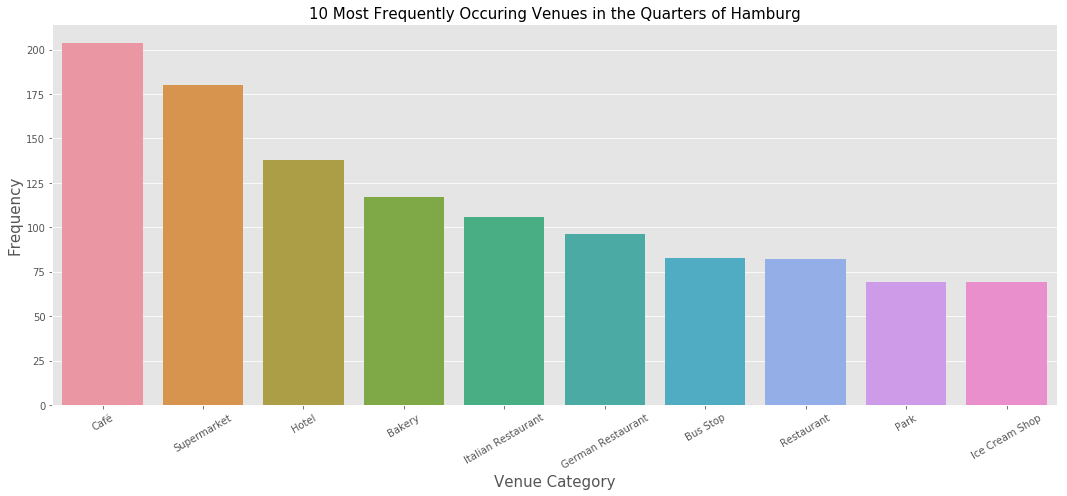

In [25]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Hamburg_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in the Quarters of Hamburg', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
#plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

For further use we have to Onehot Encode the venues.

In [26]:
### Use One Hot Encoding to Get More Information about the Venue Categories 
Hamburg_Venues_onehot = pd.get_dummies(Hamburg_Venues[['Venue_Category']], prefix="", prefix_sep="")

### add district column back to dataframe
Hamburg_Venues_onehot['Quarter'] = Hamburg_Venues['Quarter'] 
### move district column to the first column
fixed_columns = [Hamburg_Venues_onehot.columns[-1]] + list(Hamburg_Venues_onehot.columns[:-1])
Hamburg_Venues_onehot = Hamburg_Venues_onehot[fixed_columns]
###Hamburg_Venues_onehot.head(3)

In [27]:
Hamburg_Venues_Grouped = Hamburg_Venues_onehot.groupby('Quarter').mean().reset_index()
Hamburg_Venues_Grouped.index = np.arange(1, len(Hamburg_Venues_Grouped)+1)
Hamburg_Venues_Grouped

,Quarter,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bavarian Restaurant,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Boat Rental,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Cafeteria,Café,Camera Store,Campground,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,College Arts Building,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Duty-free Shop,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kumpir Restaurant,Lake,Laundromat,Lebanese Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lottery Retailer,Lounge,Market,Martial Arts Dojo,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nature Preserve,Neighborhood,Night Market,Nightclub,Opera House,Optical Shop,Organic Grocery,Outdoor Supply Store,Outlet Store,Paella Restaurant,Pakistani Restaurant,Palatine Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Pide Place,Pier,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Post Office,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Rest Area,Restaurant,River,Road,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Sri Lankan Restaurant,Stables,Stadium,Stationery Store,Steakhouse,Storage Facility,Street Food Gathering,Supermarket,Sushi Restaurant,Swabian Restaurant,Szechuan Restaurant,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Track,Trail,Train Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,V

Next we check the top 5 venues of each quarter.

In [28]:
num_top_venues = 5

for places in Hamburg_Venues_Grouped['Quarter']:
    print("%%%%%%%%%"+places+"%%%%%%%%")
    temp = Hamburg_Venues_Grouped[Hamburg_Venues_Grouped['Quarter'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

%%%%%%%%%Allermöhe%%%%%%%%
                 Venue  Freq
0  Sporting Goods Shop  0.17
1         Intersection  0.17
2     Lottery Retailer  0.17
3                 Lake  0.17
4          Event Space  0.17


%%%%%%%%%Alsterdorf%%%%%%%%
               Venue  Freq
0           Bus Stop  0.21
1        Supermarket  0.07
2              Hotel  0.07
3   Asian Restaurant  0.07
4  Convenience Store  0.04


%%%%%%%%%Altengamme%%%%%%%%
          Venue  Freq
0       Stables   0.5
1       Dog Run   0.5
2          Pier   0.0
3   Music Venue   0.0
4  Optical Shop   0.0


%%%%%%%%%Altona-Altstadt%%%%%%%%
                Venue  Freq
0  Seafood Restaurant  0.10
1                Café  0.07
2        Cocktail Bar  0.04
3          Restaurant  0.03
4                 Bar  0.03


%%%%%%%%%Altona-Nord%%%%%%%%
         Venue  Freq
0  Supermarket  0.11
1    Nightclub  0.09
2          Bar  0.04
3   Restaurant  0.04
4       Bakery  0.04


%%%%%%%%%Bahrenfeld%%%%%%%%
                Venue  Freq
0  Italian Restaurant  0.09

Assignt the top 10 venue categories to each quarter.

In [39]:
## Define a Function to select the top 10 rows (According to the Values) 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Quarter']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Quarter_top10_venues_sorted = pd.DataFrame(columns=columns)
Quarter_top10_venues_sorted['Quarter'] = Hamburg_Venues_Grouped['Quarter']

for ind in np.arange(Hamburg_Venues_Grouped.shape[0]):
    Quarter_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Hamburg_Venues_Grouped.iloc[ind, :], num_top_venues)

    
Quarter_top10_venues_sorted.index = np.arange(1, len(Quarter_top10_venues_sorted)+1)
Quarter_top10_venues_sorted.head(5)

,Quarter,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Allermöhe,Sporting Goods Shop,Lake,Lottery Retailer,Racetrack,Intersection,Event Space,Farmers Market,Farm,Falafel Restaurant,Exhibit
2,Alsterdorf,Bus Stop,Asian Restaurant,Hotel,Supermarket,Doner Restaurant,Restaurant,Café,Diner,Nature Preserve,Drugstore
3,Altengamme,Dog Run,Stables,Exhibit,Doner Restaurant,Donut Shop,Drugstore,Duty-free Shop,Eastern European Restaurant,Electronics Store,Event Space
4,Altona-Altstadt,Seafood Restaurant,Café,Cocktail Bar,Turkish Restaurant,Bar,Restaurant,Burger Joint,Pub,Wine Bar,Nightclub
5,Altona-Nord,Supermarket,Nightclub,Bar,German Restaurant,Bakery,Restaurant,Rental Car Location,Beach Bar,French Restaurant,Burger Joint


The venue dataframe gets joined with the dataframe with further information about the quarters.

In [30]:
df_Hamburg = df_work.merge(Quarter_top10_venues_sorted, on='Quarter')
df_Hamburg.head()

,Quarter,Population in %,People under 18 years in %,People over 64 years in %,Price per m2 in EUR,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rahlstedt,4.895785,17.447630,22.276261,2990,53.603883,10.158155,Drugstore,Supermarket,Bakery,German Restaurant,Clothing Store,Farmers Market,Bus Stop,Sandwich Place,Restaurant,Bagel Shop
1,Billstedt,3.765894,19.355250,17.927671,2932,53.548899,10.122625,Eastern European Restaurant,Home Service,Pool,Soccer Field,Dance Studio,Park,Zoo Exhibit,Dog Run,Doner Restaurant,Donut Shop
2,Eimsbüttel,3.071965,12.832589,12.606663,4982,53.572483,9.950100,Café,Bar,Coffee Shop,Park,Greek Restaurant,Bakery,Drugstore,Gym / Fitness Center,Pub,Ice Cream Shop
3,Winterhude,2.971062,12.529874,14.556791,5780,53.596390,10.003832,Café,Park,Bus Stop,Italian Restaurant,German Restaurant,Drugstore,Steakhouse,Metro Station,Asian Restaurant,Trattoria/Osteria
4,Wilhelmsburg,2.891942,20.742491,13.465266,3249,53.492292,9.996217,German Restaurant,Park,Climbing Gym,Restaurant,Supermarket,Turkish Restaurant,Light Rail Station,Gym Pool,Basketball Court,Hotel


## Clustering the Quarters with k-Means

We cluster the quarters by the venues.

In [40]:
# set number of clusters
kclusters = 10

Hamburg_grouped_clustering = Hamburg_Venues_Grouped.drop('Quarter', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Hamburg_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_[0:5])

Check the 5 Cluster labels : [5 8 6 4 9]


In [41]:
df1 = df_work.copy()

In [42]:
# add clustering labels

Quarter_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Hamburg_Coordinate_Cluster_merged = df1

#merge the inital Hamburg Dataframe with Sorted Most Visited places for each neighborhood

Hamburg_Coordinate_Cluster_merged = Hamburg_Coordinate_Cluster_merged.join \
                                        (Quarter_top10_venues_sorted.set_index('Quarter'), on='Quarter')

Hamburg_Coordinate_Cluster_merged.head()

,Quarter,Population in %,People under 18 years in %,People over 64 years in %,Price per m2 in EUR,latitude,longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
69,Rahlstedt,4.895785,17.447630,22.276261,2990,53.603883,10.158155,9,Drugstore,Supermarket,Bakery,German Restaurant,Clothing Store,Farmers Market,Bus Stop,Sandwich Place,Restaurant,Bagel Shop
9,Billstedt,3.765894,19.355250,17.927671,2932,53.548899,10.122625,4,Eastern European Restaurant,Home Service,Pool,Soccer Field,Dance Studio,Park,Zoo Exhibit,Dog Run,Doner Restaurant,Donut Shop
30,Eimsbüttel,3.071965,12.832589,12.606663,4982,53.572483,9.950100,4,Café,Bar,Coffee Shop,Park,Greek Restaurant,Bakery,Drugstore,Gym / Fitness Center,Pub,Ice Cream Shop
43,Winterhude,2.971062,12.529874,14.556791,5780,53.596390,10.003832,4,Café,Park,Bus Stop,Italian Restaurant,German Restaurant,Drugstore,Steakhouse,Metro Station,Asian Restaurant,Trattoria/Osteria
13,Wilhelmsburg,2.891942,20.742491,13.465266,3249,53.492292,9.996217,9,German Restaurant,Park,Climbing Gym,Restaurant,Supermarket,Turkish Restaurant,Light Rail Station,Gym Pool,Basketball Court,Hotel


# 5. Results

After we did the clustering lets have a look at the results. 

First we visualize the clustered quarters.

In [44]:
import matplotlib.colors as colors

In [45]:

# create map
map_clusters = folium.Map(location=[53.551086,9.993682], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Hamburg_Coordinate_Cluster_merged['latitude'], 
                                  Hamburg_Coordinate_Cluster_merged['longitude'], 
                                  Hamburg_Coordinate_Cluster_merged['Quarter'], 
                                  Hamburg_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

As we can see, Cluster Lable 4 is very widespread in the city center but also in some outer regions present. 
This clusters need further investigation.

## Cluster Exploration

Lets find out more about the clusters.

In [46]:
Hamburg_Cluster1 = Hamburg_Coordinate_Cluster_merged.loc[Hamburg_Coordinate_Cluster_merged['Cluster Label'] == 0]
                                                          
#                                    ,Hamburg_Coordinate_Cluster_merged.columns[[3] + list(range(4, Hamburg_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Quarters in Cluster Label 0: %d" %(Hamburg_Cluster1.shape[0]))
Hamburg_Cluster1

No of Quarters in Cluster Label 0: 5


,Quarter,Population in %,People under 18 years in %,People over 64 years in %,Price per m2 in EUR,latitude,longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Eidelstedt,1.740483,16.361461,22.076010,2939,53.605000,9.916110,0,Supermarket,Bus Stop,Indoor Play Area,Bank,Italian Restaurant,Shipping Store,Soccer Field,Sandwich Place,Drugstore,Steakhouse
38,Stellingen,1.374886,13.843047,18.902652,3857,53.596777,9.928410,0,Zoo Exhibit,Supermarket,Hotel,Indoor Play Area,Gym / Fitness Center,Bus Stop,Fast Food Restaurant,Gas Station,Taverna,Karaoke Bar
83,Neuallermöhe,1.272969,23.137896,8.652072,.,53.483060,10.163049,0,Soccer Field,Farmers Market,Plaza,Light Rail Station,Building,Indoor Play Area,Lake,Drugstore,Supermarket,Zoo Exhibit
61,Sasel,1.262452,19.084873,25.660760,3209,53.652200,10.116900,0,Asian Restaurant,Construction & Landscaping,Gastropub,Taverna,Gas Station,Furniture / Home Store,Supermarket,Bus Stop,Farmers Market,Indian Restaurant
80,Moorfleet,0.066948,16.746411,15.629984,.,53.509200,10.082800,0,Intersection,Fast Food Restaurant,Furniture / Home Store,Hot Dog Joint,Business Service,Scandinavian Restaurant,Gas Station,Bakery,Asian Restaurant,Golf Course


In [52]:
Hamburg_Cluster2 = Hamburg_Coordinate_Cluster_merged.loc[Hamburg_Coordinate_Cluster_merged['Cluster Label'] == 1]
                                                          
#                                    ,Hamburg_Coordinate_Cluster_merged.columns[[3] + list(range(4, Hamburg_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Quarters in Cluster Label 1: %d" %(Hamburg_Cluster2.shape[0]))
Hamburg_Cluster2

No of Quarters in Cluster Label 1: 6


,Quarter,Population in %,People under 18 years in %,People over 64 years in %,Price per m2 in EUR,latitude,longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
97,Neuenfelde,0.259516,21.106768,15.038058,.,53.518241,9.807916,1,German Restaurant,Supermarket,Taverna,Bus Stop,Electronics Store,Doner Restaurant,Donut Shop,Drugstore,Duty-free Shop,Eastern European Restaurant
66,Wohldorf-Ohlstedt,0.244781,21.003272,21.155943,3689,53.701900,10.130600,1,German Restaurant,History Museum,Metro Station,Forest,Convenience Store,Sports Club,Plaza,Ice Cream Shop,Electronics Store,Doner Restaurant
76,Ochsenwerder,0.140302,17.275495,19.101979,.,53.475203,10.081077,1,IT Services,German Restaurant,Zoo Exhibit,Exhibit,Donut Shop,Drugstore,Duty-free Shop,Eastern European Restaurant,Electronics Store,Event Space
98,Cranz,0.044845,14.166667,17.857143,.,53.537285,9.777929,1,German Restaurant,Boat or Ferry,Bus Stop,Event Space,Donut Shop,Drugstore,Duty-free Shop,Eastern European Restaurant,Electronics Store,Exhibit
93,Moorburg,0.039827,20.777480,13.806971,.,53.484864,9.923830,1,German Restaurant,Music Venue,Cable Car,Intersection,Farmers Market,Farm,Falafel Restaurant,Exhibit,Event Space,Dog Run
82,Spadenland,0.027441,14.785992,22.568093,.,53.481400,10.066400,1,German Restaurant,Farmers Market,Campground,Bus Stop,Breakfast Spot,Garden,Donut Shop,Drugstore,Duty-free Shop,Eastern European Restaurant


In [54]:
Hamburg_Cluster3 = Hamburg_Coordinate_Cluster_merged.loc[Hamburg_Coordinate_Cluster_merged['Cluster Label'] == 2]
                                                          
#                                    ,Hamburg_Coordinate_Cluster_merged.columns[[3] + list(range(4, Hamburg_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Quarters in Cluster Label 2: %d" %(Hamburg_Cluster3.shape[0]))
Hamburg_Cluster3

No of Quarters in Cluster Label 2: 2


,Quarter,Population in %,People under 18 years in %,People over 64 years in %,Price per m2 in EUR,latitude,longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
70,Lohbrügge,2.091078,15.586703,23.802594,2821,53.506348,10.208643,2,Supermarket,Hotel,Exhibit,Doner Restaurant,Donut Shop,Drugstore,Duty-free Shop,Eastern European Restaurant,Electronics Store,Event Space
72,Curslack,0.211628,21.014127,15.211907,.,53.449068,10.229090,2,Supermarket,Zoo Exhibit,Exhibit,Doner Restaurant,Donut Shop,Drugstore,Duty-free Shop,Eastern European Restaurant,Electronics Store,Event Space


In [55]:
Hamburg_Cluster4 = Hamburg_Coordinate_Cluster_merged.loc[Hamburg_Coordinate_Cluster_merged['Cluster Label'] == 3]
                                                          
#                                    ,Hamburg_Coordinate_Cluster_merged.columns[[3] + list(range(4, Hamburg_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Quarters in Cluster Label 3: %d" %(Hamburg_Cluster4.shape[0]))
Hamburg_Cluster4

No of Quarters in Cluster Label 3: 1


,Quarter,Population in %,People under 18 years in %,People over 64 years in %,Price per m2 in EUR,latitude,longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
75,Kirchwerder,0.529069,17.275479,19.959637,.,53.420677,10.199915,3,Basketball Court,Zoo Exhibit,Dog Run,Donut Shop,Drugstore,Duty-free Shop,Eastern European Restaurant,Electronics Store,Event Space,Exhibit


In [72]:
Hamburg_Cluster5 = Hamburg_Coordinate_Cluster_merged.loc[Hamburg_Coordinate_Cluster_merged['Cluster Label'] == 4]
                                                          
#                                    ,Hamburg_Coordinate_Cluster_merged.columns[[3] + list(range(4, Hamburg_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Quarters in Cluster Label 4: %d" %(Hamburg_Cluster5.shape[0]))
Hamburg_Cluster5

No of Quarters in Cluster Label 4: 30


,Quarter,Population in %,People under 18 years in %,People over 64 years in %,Price per m2 in EUR,latitude,longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Billstedt,3.765894,19.355250,17.927671,2932,53.548899,10.122625,4,Eastern European Restaurant,Home Service,Pool,Soccer Field,Dance Studio,Park,Zoo Exhibit,Dog Run,Doner Restaurant,Donut Shop
30,Eimsbüttel,3.071965,12.832589,12.606663,4982,53.572483,9.950100,4,Café,Bar,Coffee Shop,Park,Greek Restaurant,Bakery,Drugstore,Gym / Fitness Center,Pub,Ice Cream Shop
43,Winterhude,2.971062,12.529874,14.556791,5780,53.596390,10.003832,4,Café,Park,Bus Stop,Italian Restaurant,German Restaurant,Drugstore,Steakhouse,Metro Station,Asian Restaurant,Trattoria/Osteria
19,Ottensen,1.894185,15.741263,13.785231,5512,53.555066,9.919819,4,Café,Ice Cream Shop,Restaurant,Bakery,Italian Restaurant,Coffee Shop,Pizza Place,Park,Bar,Vegetarian / Vegan Restaurant
16,Altona-Altstadt,1.570017,15.254353,12.863847,6064,53.549660,9.945352,4,Seafood Restaurant,Café,Cocktail Bar,Turkish Restaurant,Bar,Restaurant,Burger Joint,Pub,Wine Bar,Nightclub
40,Eppendorf,1.319630,13.722793,18.460231,5688,53.590391,9.986877,4,Café,Italian Restaurant,Bakery,Bistro,Park,Drugstore,Supermarket,Vietnamese Restaurant,Coffee Shop,Gastropub
3,St. Pauli,1.201270,13.292743,9.555131,5991,53.553935,9.959432,4,Café,Bar,Coffee Shop,Cocktail Bar,Pizza Place,Music Venue,Nightclub,Burger Joint,Austrian Restaurant,Hotel
44,Uhlenhorst,0.961881,12.621413,19.365044,6530,53.571509,10.012736,4,Italian Restaurant,Café,Park,Supermarket,German Restaurant,Hotel,Restaurant,Asian Restaurant,Ice Cream Shop,Shopping Mall
32,Harvestehude,0.958411,15.457888,20.526961,8560,53.575433,9.980440,4,Café,Restaurant,Steakhouse,Bakery,Italian Restaurant,Farmers Market,Ice Cream Shop,Falafel Restaurant,Drugstore,Pub
31,Rotherbaum,0.893919,13.586957,15.665313,6668,53.568407,9.987432,4,Café,Italian Restaurant,Restaurant,Hotel,Mediterranean Restaurant,Steakhouse,Bakery,Falafel Restaurant,Cocktail Bar,German Restaurant


In [57]:
Hamburg_Cluster6 = Hamburg_Coordinate_Cluster_merged.loc[Hamburg_Coordinate_Cluster_merged['Cluster Label'] == 5]
                                                          
#                                    ,Hamburg_Coordinate_Cluster_merged.columns[[3] + list(range(4, Hamburg_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Quarters in Cluster Label 5: %d" %(Hamburg_Cluster6.shape[0]))
Hamburg_Cluster6

No of Quarters in Cluster Label 5: 2


,Quarter,Population in %,People under 18 years in %,People over 64 years in %,Price per m2 in EUR,latitude,longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
78,Allermöhe,0.072660,15.135929,20.132256,3128,53.483600,10.125000,5,Sporting Goods Shop,Lake,Lottery Retailer,Racetrack,Intersection,Event Space,Farmers Market,Farm,Falafel Restaurant,Exhibit
77,Reitbrook,0.027014,11.857708,25.296443,.,53.468845,10.152123,5,Lake,River,Electronics Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Duty-free Shop,Eastern European Restaurant,Event Space


In [58]:
Hamburg_Cluster7 = Hamburg_Coordinate_Cluster_merged.loc[Hamburg_Coordinate_Cluster_merged['Cluster Label'] == 6]
                                                          
#                                    ,Hamburg_Coordinate_Cluster_merged.columns[[3] + list(range(4, Hamburg_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Quarters in Cluster Label 6: %d" %(Hamburg_Cluster7.shape[0]))
Hamburg_Cluster7

No of Quarters in Cluster Label 6: 1


,Quarter,Population in %,People under 18 years in %,People over 64 years in %,Price per m2 in EUR,latitude,longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
73,Altengamme,0.119908,18.610864,19.545859,.,53.429725,10.272787,6,Dog Run,Stables,Exhibit,Doner Restaurant,Donut Shop,Drugstore,Duty-free Shop,Eastern European Restaurant,Electronics Store,Event Space


In [59]:
Hamburg_Cluster8 = Hamburg_Coordinate_Cluster_merged.loc[Hamburg_Coordinate_Cluster_merged['Cluster Label'] == 7]
                                                          
#                                    ,Hamburg_Coordinate_Cluster_merged.columns[[3] + list(range(4, Hamburg_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Quarters in Cluster Label 7: %d" %(Hamburg_Cluster8.shape[0]))
Hamburg_Cluster8

No of Quarters in Cluster Label 7: 1


,Quarter,Population in %,People under 18 years in %,People over 64 years in %,Price per m2 in EUR,latitude,longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
87,Rönneburg,0.172601,18.929787,18.001856,2405,53.436755,10.009056,7,Greek Restaurant,Paper / Office Supplies Store,Zoo Exhibit,Electronics Store,Doner Restaurant,Donut Shop,Drugstore,Duty-free Shop,Eastern European Restaurant,Event Space


In [61]:
Hamburg_Cluster9 = Hamburg_Coordinate_Cluster_merged.loc[Hamburg_Coordinate_Cluster_merged['Cluster Label'] == 8]
                                                          
#                                    ,Hamburg_Coordinate_Cluster_merged.columns[[3] + list(range(4, Hamburg_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Quarters in Cluster Label 8: %d" %(Hamburg_Cluster9.shape[0]))
Hamburg_Cluster9

No of Quarters in Cluster Label 8: 14


,Quarter,Population in %,People under 18 years in %,People over 64 years in %,Price per m2 in EUR,latitude,longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Lurup,1.935667,20.136801,18.393689,3239,53.592952,9.874564,8,Supermarket,German Restaurant,Bus Stop,Fast Food Restaurant,Steakhouse,Gastropub,Taverna,Doner Restaurant,Burger Joint,Hardware Store
55,Jenfeld,1.400779,19.612775,17.920573,2859,53.575837,10.133736,8,Bus Stop,Supermarket,Park,Fast Food Restaurant,Soccer Field,Greek Restaurant,Electronics Store,Donut Shop,Drugstore,Duty-free Shop
91,Eißendorf,1.310127,16.943765,20.480848,2700,53.451400,9.942197,8,Greek Restaurant,Mountain,Trail,Bus Stop,Zoo Exhibit,Eastern European Restaurant,Doner Restaurant,Donut Shop,Drugstore,Duty-free Shop
59,Steilshoop,1.049703,19.606347,19.753840,2635,53.610684,10.058728,8,Bus Stop,Gym / Fitness Center,Supermarket,Track,Fast Food Restaurant,Automotive Shop,Lounge,Italian Restaurant,Pool,Pet Store
47,Dulsberg,0.931183,12.435501,12.636166,3057,53.582566,10.062929,8,Supermarket,Bus Stop,Park,Bakery,Athletics & Sports,Metro Station,Greek Restaurant,Hookah Bar,Lake,Bar
86,Wilstorf,0.930916,17.543155,19.234960,3072,53.445585,9.981617,8,Supermarket,Bus Stop,German Restaurant,Lake,Water Park,Gas Station,Bus Station,Spanish Restaurant,Bakery,Falafel Restaurant
94,Hausbruch,0.906465,18.917486,19.983509,2325,53.471441,9.880114,8,Supermarket,Tennis Court,Taverna,German Restaurant,Light Rail Station,Trail,Bus Stop,Bed & Breakfast,Gas Station,Asian Restaurant
42,Alsterdorf,0.802466,16.525847,18.874326,4486,53.610541,10.003889,8,Bus Stop,Asian Restaurant,Hotel,Supermarket,Doner Restaurant,Restaurant,Café,Diner,Nature Preserve,Drugstore
56,Tonndorf,0.790774,17.519579,18.187956,3100,53.586900,10.117500,8,Supermarket,Bus Stop,Bakery,Photography Studio,Asian Restaurant,Fast Food Restaurant,Food Court,Seafood Restaurant,Eastern European Restaurant,Bar
67,Bergstedt,0.578506,21.696198,21.114803,3239,53.673430,10.126876,8,Supermarket,Department Store,Food & Drink Shop,Restaurant,Bus Stop,Gym / Fitness Center,Bakery,Donut Shop,Drugstore,Duty-free Shop


In [62]:
Hamburg_Cluster10 = Hamburg_Coordinate_Cluster_merged.loc[Hamburg_Coordinate_Cluster_merged['Cluster Label'] == 9]
                                                          
#                                    ,Hamburg_Coordinate_Cluster_merged.columns[[3] + list(range(4, Hamburg_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Quarters in Cluster Label 9: %d" %(Hamburg_Cluster10.shape[0]))
Hamburg_Cluster10

No of Quarters in Cluster Label 9: 37


,Quarter,Population in %,People under 18 years in %,People over 64 years in %,Price per m2 in EUR,latitude,longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
69,Rahlstedt,4.895785,17.447630,22.276261,2990,53.603883,10.158155,9,Drugstore,Supermarket,Bakery,German Restaurant,Clothing Store,Farmers Market,Bus Stop,Sandwich Place,Restaurant,Bagel Shop
13,Wilhelmsburg,2.891942,20.742491,13.465266,3249,53.492292,9.996217,9,German Restaurant,Park,Climbing Gym,Restaurant,Supermarket,Turkish Restaurant,Light Rail Station,Gym Pool,Basketball Court,Hotel
58,Bramfeld,2.794404,14.701387,21.518093,3200,53.616809,10.079001,9,Supermarket,Plaza,Bakery,Ice Cream Shop,German Restaurant,Bus Stop,Italian Restaurant,Shopping Mall,Clothing Store,Flower Shop
51,Langenhorn,2.449841,17.475157,19.355823,3319,53.663300,10.008300,9,Bakery,Ice Cream Shop,Fast Food Restaurant,Metro Station,Building,Gym / Fitness Center,Seafood Restaurant,Event Space,Donut Shop,Drugstore
48,Barmbek-Nord,2.236505,10.274038,13.107515,3820,53.598894,10.048100,9,Italian Restaurant,Supermarket,Café,Drugstore,Bus Stop,Bakery,Vietnamese Restaurant,Hotel,Taverna,Steakhouse
35,Niendorf,2.224653,15.737941,26.054716,3146,53.628411,9.955709,9,Supermarket,Greek Restaurant,Metro Station,Italian Restaurant,Clothing Store,Department Store,Chinese Restaurant,Outlet Store,Drugstore,Shoe Store
7,Hamm,2.066947,11.501705,13.942556,3414,53.553443,10.051294,9,Supermarket,Hotel,Café,Greek Restaurant,Park,Convenience Store,Soccer Field,Metro Station,Bus Stop,Sandwich Place
8,Horn,2.059099,15.559128,15.657653,2789,53.554062,10.088918,9,Supermarket,Park,Bakery,Hotel,Post Office,Drugstore,Café,Discount Store,BBQ Joint,German Restaurant
53,Wandsbek,1.909561,13.260456,18.312458,3309,53.576003,10.075535,9,Bakery,Electronics Store,Café,Supermarket,Chinese Restaurant,German Restaurant,Ice Cream Shop,Athletics & Sports,Metro Station,Drugstore
71,Bergedorf,1.904275,17.348398,20.037007,2963,53.485800,10.226700,9,Restaurant,Trattoria/Osteria,Café,Department Store,Snack Place,Bakery,Ice Cream Shop,Park,Clothing Store,Sushi Restaurant


It seems most attractive to open a cafe in a quarter of cluster label 4. Those quarters have a vivid cafe and bar scene. So lets dive deeper into this cluster.

In [74]:
#We noticed that some values of price per m2 are missing. Because this is vital for our decison we remove those quarters.
Hamburg_Cluster5["Price per m2 in EUR"].unique()
Hamburg_Cluster5.drop(Hamburg_Cluster5.loc[Hamburg_Cluster5["Price per m2 in EUR"]=='.    '].index, inplace=True, axis=0)
Hamburg_Cluster5["Price per m2 in EUR"].unique()

array([2932, 4982, 5780, 5512, 6064, 5688, 5991, 6530, 8560, 6668, 3873,
       5908, 5624, 5081, 5169, 4629, 5302, 5886, 7958, 5710], dtype=object)

In [75]:
#We make sure that the price is stated as integer.
Hamburg_Cluster5["Price per m2 in EUR"]=Hamburg_Cluster5["Price per m2 in EUR"].astype(int)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Lets visualise this cluster to gain the inside we need to decide for a quarter.

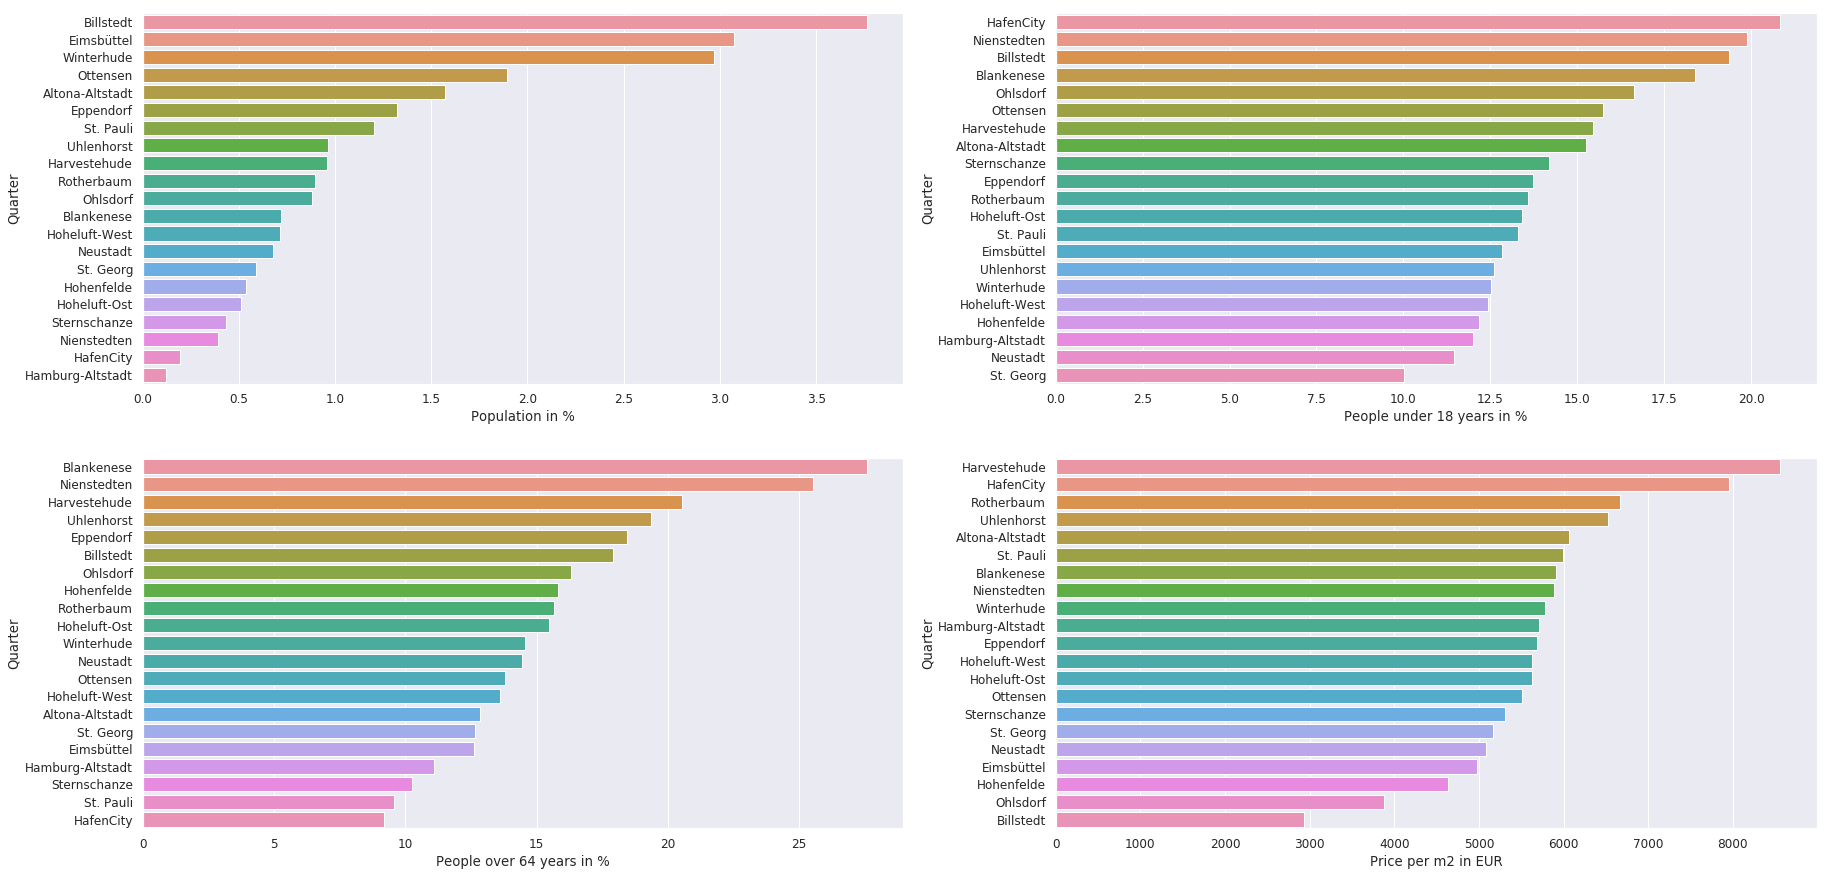

In [92]:
Hamburg_Cluster5

fig = plt.figure(figsize=(30,15))

sns.set(font_scale=1.1)
ax = plt.subplot(2,2,1)
ham_clust_pop = Hamburg_Cluster5.sort_values("Population in %", ascending=False)
sns.barplot(y="Quarter", x="Population in %", data=ham_clust_pop, );
plt.xlabel("Population in %")

ax = plt.subplot(2,2,2)
ham_clust_18 = Hamburg_Cluster5.sort_values("People under 18 years in %", ascending=False)
sns.barplot(y="Quarter", x="People under 18 years in %", data=ham_clust_18, );
plt.xlabel("People under 18 years in %")

plt.subplot(2,2,3)
ham_clust_64 = Hamburg_Cluster5.sort_values("People over 64 years in %", ascending=False)
sns.barplot(y="Quarter", x="People over 64 years in %", data=ham_clust_64, );
plt.xlabel("People over 64 years in %")

plt.subplot(2,2,4)
ham_clust_EUR = Hamburg_Cluster5.sort_values("Price per m2 in EUR", ascending=False)
sns.barplot(y="Quarter", x="Price per m2 in EUR", data=ham_clust_EUR, );
plt.xlabel("Price per m2 in EUR")

#sns.distplot(Hamburg_Cluster5["Price per m2 in EUR"], );

#ax.title.set_text("5 Major Districts and Violin Plots of Most Frequently Visited Restaurants")
#ax.set_title('5 Major Districts and Violin Plots of Most Frequently Visited Restaurants')
#plt.savefig ("Violin_plots_Dist_Frequent_Restaurant.png", dpi=240)
plt.show()

# 6. Discussion and recommendation

As we can see, **Billstedt** is the quarter with the highest population in cluster 5. It contributes with nearly 3.8% to the total population of Hamburg. Billstedt is by far the cheapest quarter with an average price per m2 of ca. 3.000 EUR. This price is considered for buying a flat per m2 in EUR but could also refect how expensive a quarter is in general. 

Furthermore, this quarter has with ca. 19% the third highest rate of young people (under 18) and has fairly a lot people over the age of 64 (ca. 18%). So it could be interesting to consider this in the business strategie of the cafe.

In general, this could be a good quarter for setting up our cafe.

It has to be further researched where the optimal location for this cafe is in this quarter.
Nevertheless we should not forget that other clustering algorithms than k-Means could deliver different outcomes. This has to be evaluated as well as other factors that could be vital for the success of our cafe.

# 7. Conclusion

Finally to conclude this project, we got a small glimpse how a data science project could look like. We used the most used Python libaries, the Foursquare API, Geocoding and webscraped data from the internet. We did this to analyse the quarters of Hamburg and saw the results on a Folium map in order to choose a quarter for a cafe. 
This kind of analysis can be suited as a first search for possible locations but cannot replace further research with taking more facors into considerations. 

This project demonstrated and enhanced the data mining and data science skill as part of the IBM Data Science Capstone Project. 

You are invited to learn from it and copy it. If you copy, think about what happens in the code.  